# Assignment Multiple Linear Regression
## Case Study : Bike Sharing

### Problem Statement: 
A US bike-sharing provider BoomBikes needs their business situation better for all around and stand out from other service providers and make huge profits.



## Step 1: Reading & visualizing the Data

### Reading the Bike sharing dataset

In [170]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [171]:
import numpy as np
import pandas as pd

In [128]:
bike_sharing = pd.read_csv("day.csv")

In [172]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspecting the Dataset

In [173]:
bike_sharing.shape

(730, 16)

In [174]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [175]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Quality Check

#### Step 2.1 : Checking NULL or MISSING values

In [176]:
# checking the percentage of missing values column wise
round(100*(bike_sharing.isnull().sum()/len(bike_sharing)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [177]:
# percentage of missing values in row wise
round((bike_sharing.isnull().sum(axis=1)/len(bike_sharing))*100,2).sort_values(ascending=False)

729    0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
14     0.0
13     0.0
12     0.0
11     0.0
10     0.0
Length: 730, dtype: float64

### Result => No missing/NULL values found

In [178]:
#### verfication for duplicate values

bike_dup = bike_sharing.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [179]:
bike_sharing.shape

(730, 16)

### Result => Duplicate values are not present

### Step 2.3 : Data Cleaning
Checking value_counts() to whole dataframe to identify any Unknown/Junk values present in the dataset.

In [180]:
bike_dummy=bike_sharing.iloc[:,1:16]

In [181]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
31-12-2019    1
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
             ..
15-01-2018    1
14-01-2018    1
13-01-2018    1
12-01-2018    1
11-01-2018    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### Result : No Junk/Unknown values

### Step 2.4 : Removing Redundant & Unwanted columns

As per high level analysis its clear to remove the following variables before proceeding to further analysis:
1.instant
2.dteday
3.casual
4.Registered
Proceeding with Copy of existing dataframe.

In [182]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [183]:
bike_new=bike_sharing[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [184]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 3: Data Visualization

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables : Using a pairplot

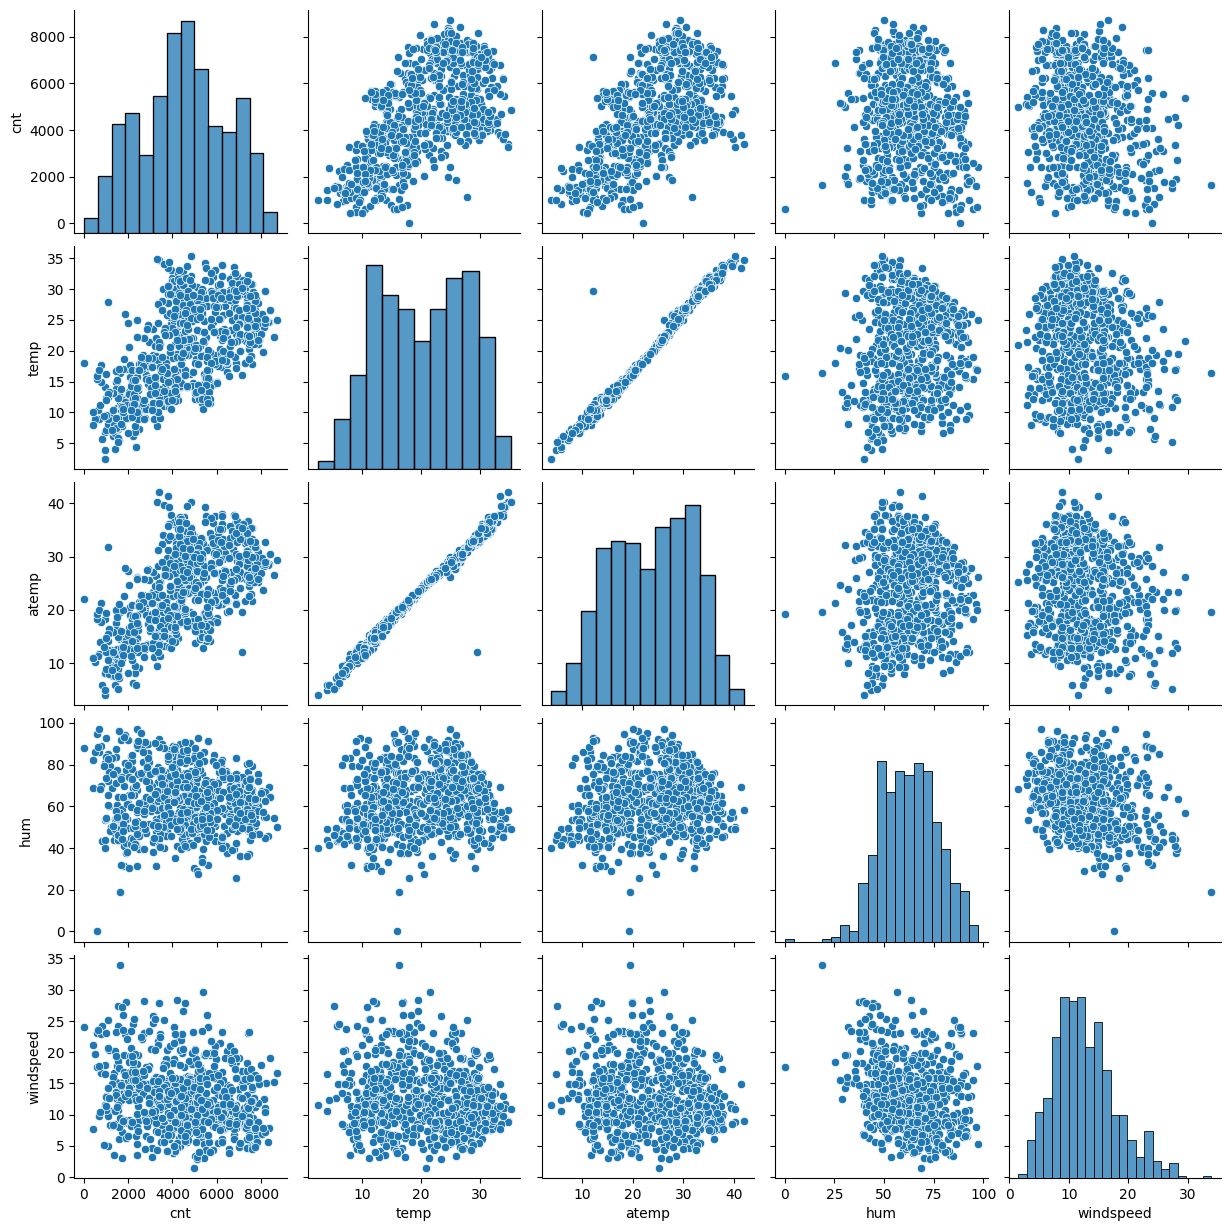

In [186]:
sns.pairplot(data = bike_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Conclusion: By visualising above numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt.  

#### Visualising Categorical Variables : Using a Boxplot

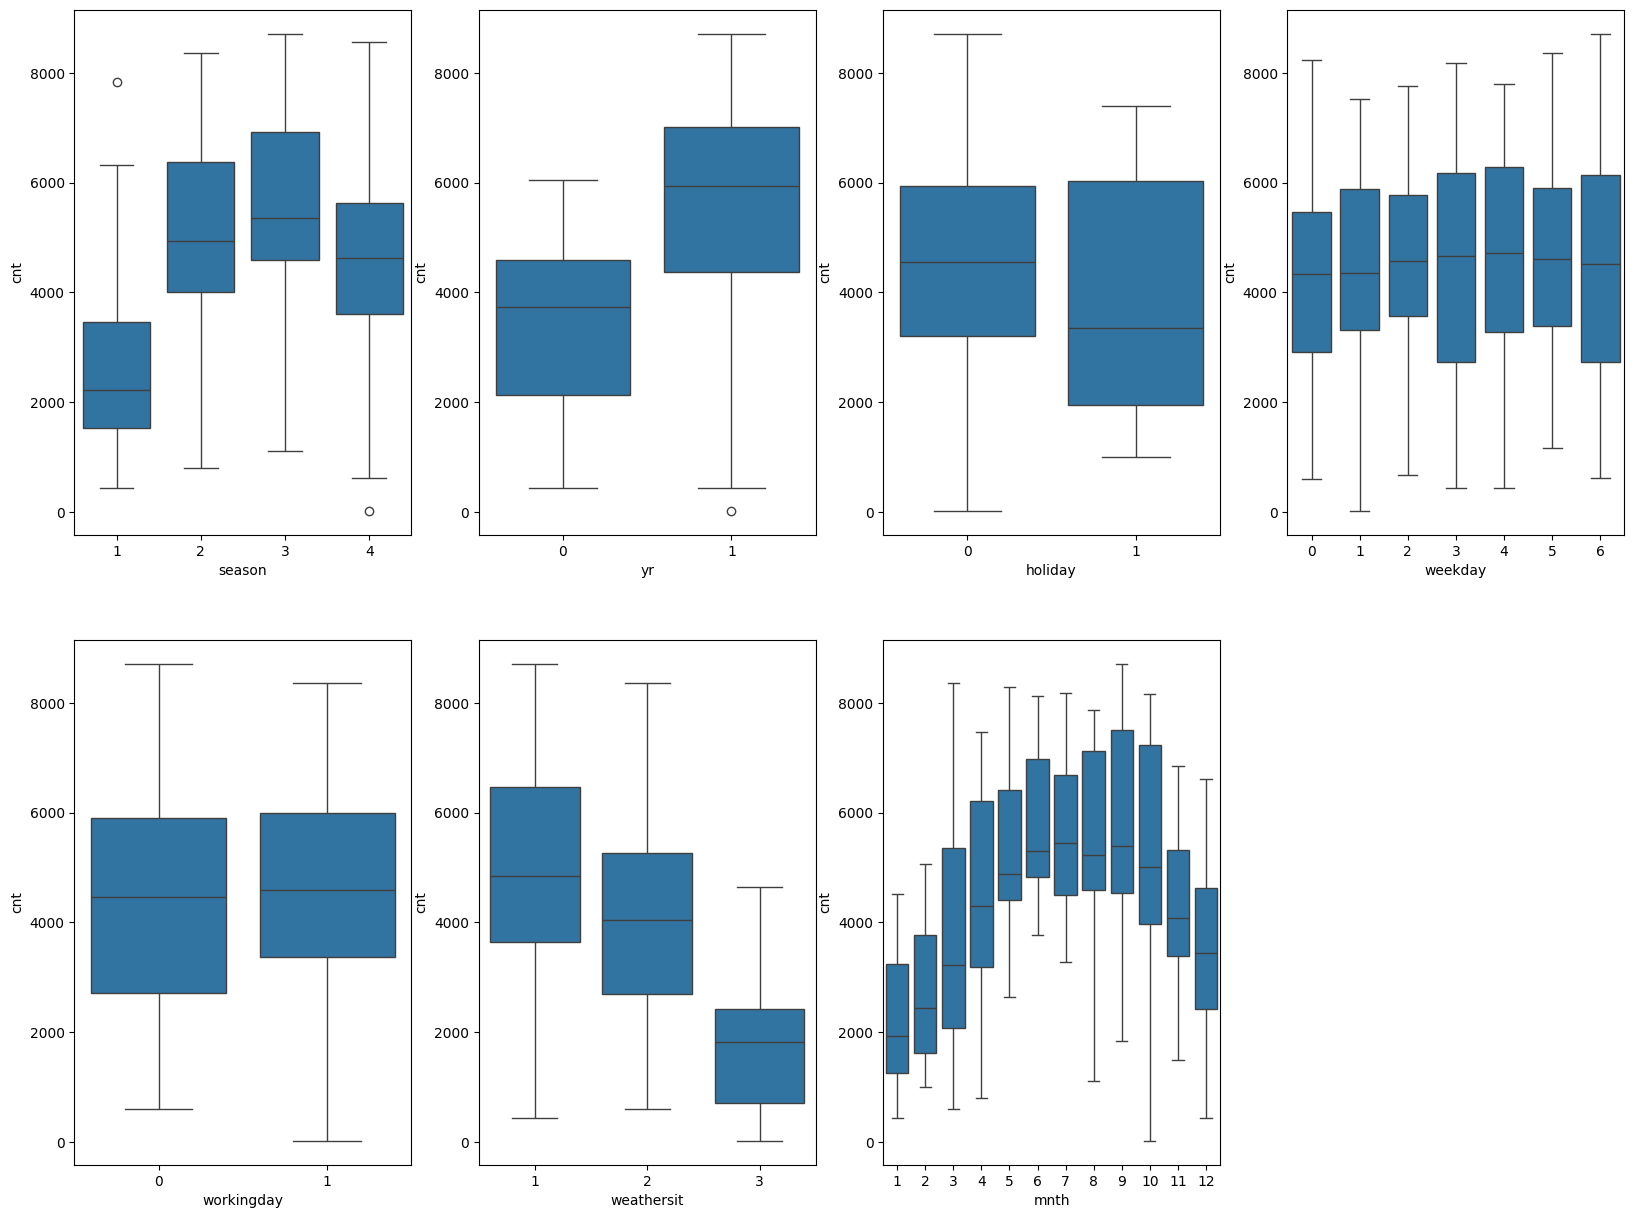

In [187]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.show()

### Conslusions through above box plots: 
1.Season: The category 3 (Fall), has the highest median, menaing that the demand was high during at this season. And it is lowest for 1: spring .

2.year: The year 2019 had a higher count of users as compared to the year 2018

3.weekday: The bike demand is almost constant throughout the week.

4.weathersit:  The count of total users is in between 4000 to 6000 (~5500) during clear weather

5.mnth: August month has the highest user count

6.workday: During holidays the count is lowets

## Step 4: Data Preparation

In [188]:
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [189]:
# Maping seasons
bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [190]:
# Mapping weathersit
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [191]:
#Mapping Weekday
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [192]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 4 : Creating Dummy Variables

In [193]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_new[['season','mnth','weekday','weathersit']]

In [194]:
dummy = pd.get_dummies(dummy,drop_first=True, dtype=int)

In [195]:
# Adding the dummy variables to the original dataset
bike_new = pd.concat([dummy,bike_new],axis = 1)

In [196]:
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [197]:
#Deleting the orginal columns season.weathersit,weekday and mnth
bike_new.drop(['season'],axis=1,inplace=True)
bike_new.drop(['weathersit'],axis=1,inplace=True)
bike_new.drop(['weekday'],axis=1,inplace=True)
bike_new.drop(['mnth'],axis=1,inplace=True)
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [198]:
bike_new.shape

(730, 30)

In [199]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    int64  
 1   season_Summer                 730 non-null    int64  
 2   season_Winter                 730 non-null    int64  
 3   mnth_Aug                      730 non-null    int64  
 4   mnth_Dec                      730 non-null    int64  
 5   mnth_Feb                      730 non-null    int64  
 6   mnth_Jan                      730 non-null    int64  
 7   mnth_Jul                      730 non-null    int64  
 8   mnth_Jun                      730 non-null    int64  
 9   mnth_Mar                      730 non-null    int64  
 10  mnth_May                      730 non-null    int64  
 11  mnth_Nov                      730 non-null    int64  
 12  mnth_Oct                      730 non-null    int64  
 13  mnth_

## Step 5: Splitting the Data into Training and Testing Sets

In [200]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [201]:
test.shape

(219, 30)

In [202]:
train.shape

(510, 30)

In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    int64  
 1   season_Summer                 510 non-null    int64  
 2   season_Winter                 510 non-null    int64  
 3   mnth_Aug                      510 non-null    int64  
 4   mnth_Dec                      510 non-null    int64  
 5   mnth_Feb                      510 non-null    int64  
 6   mnth_Jan                      510 non-null    int64  
 7   mnth_Jul                      510 non-null    int64  
 8   mnth_Jun                      510 non-null    int64  
 9   mnth_Mar                      510 non-null    int64  
 10  mnth_May                      510 non-null    int64  
 11  mnth_Nov                      510 non-null    int64  
 12  mnth_Oct                      510 non-null    int64  
 13  mnth_Sep 

## Step 6 :Rescaling Features

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [205]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [206]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [207]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check the coefficients values to verify the variables which are highly correlated

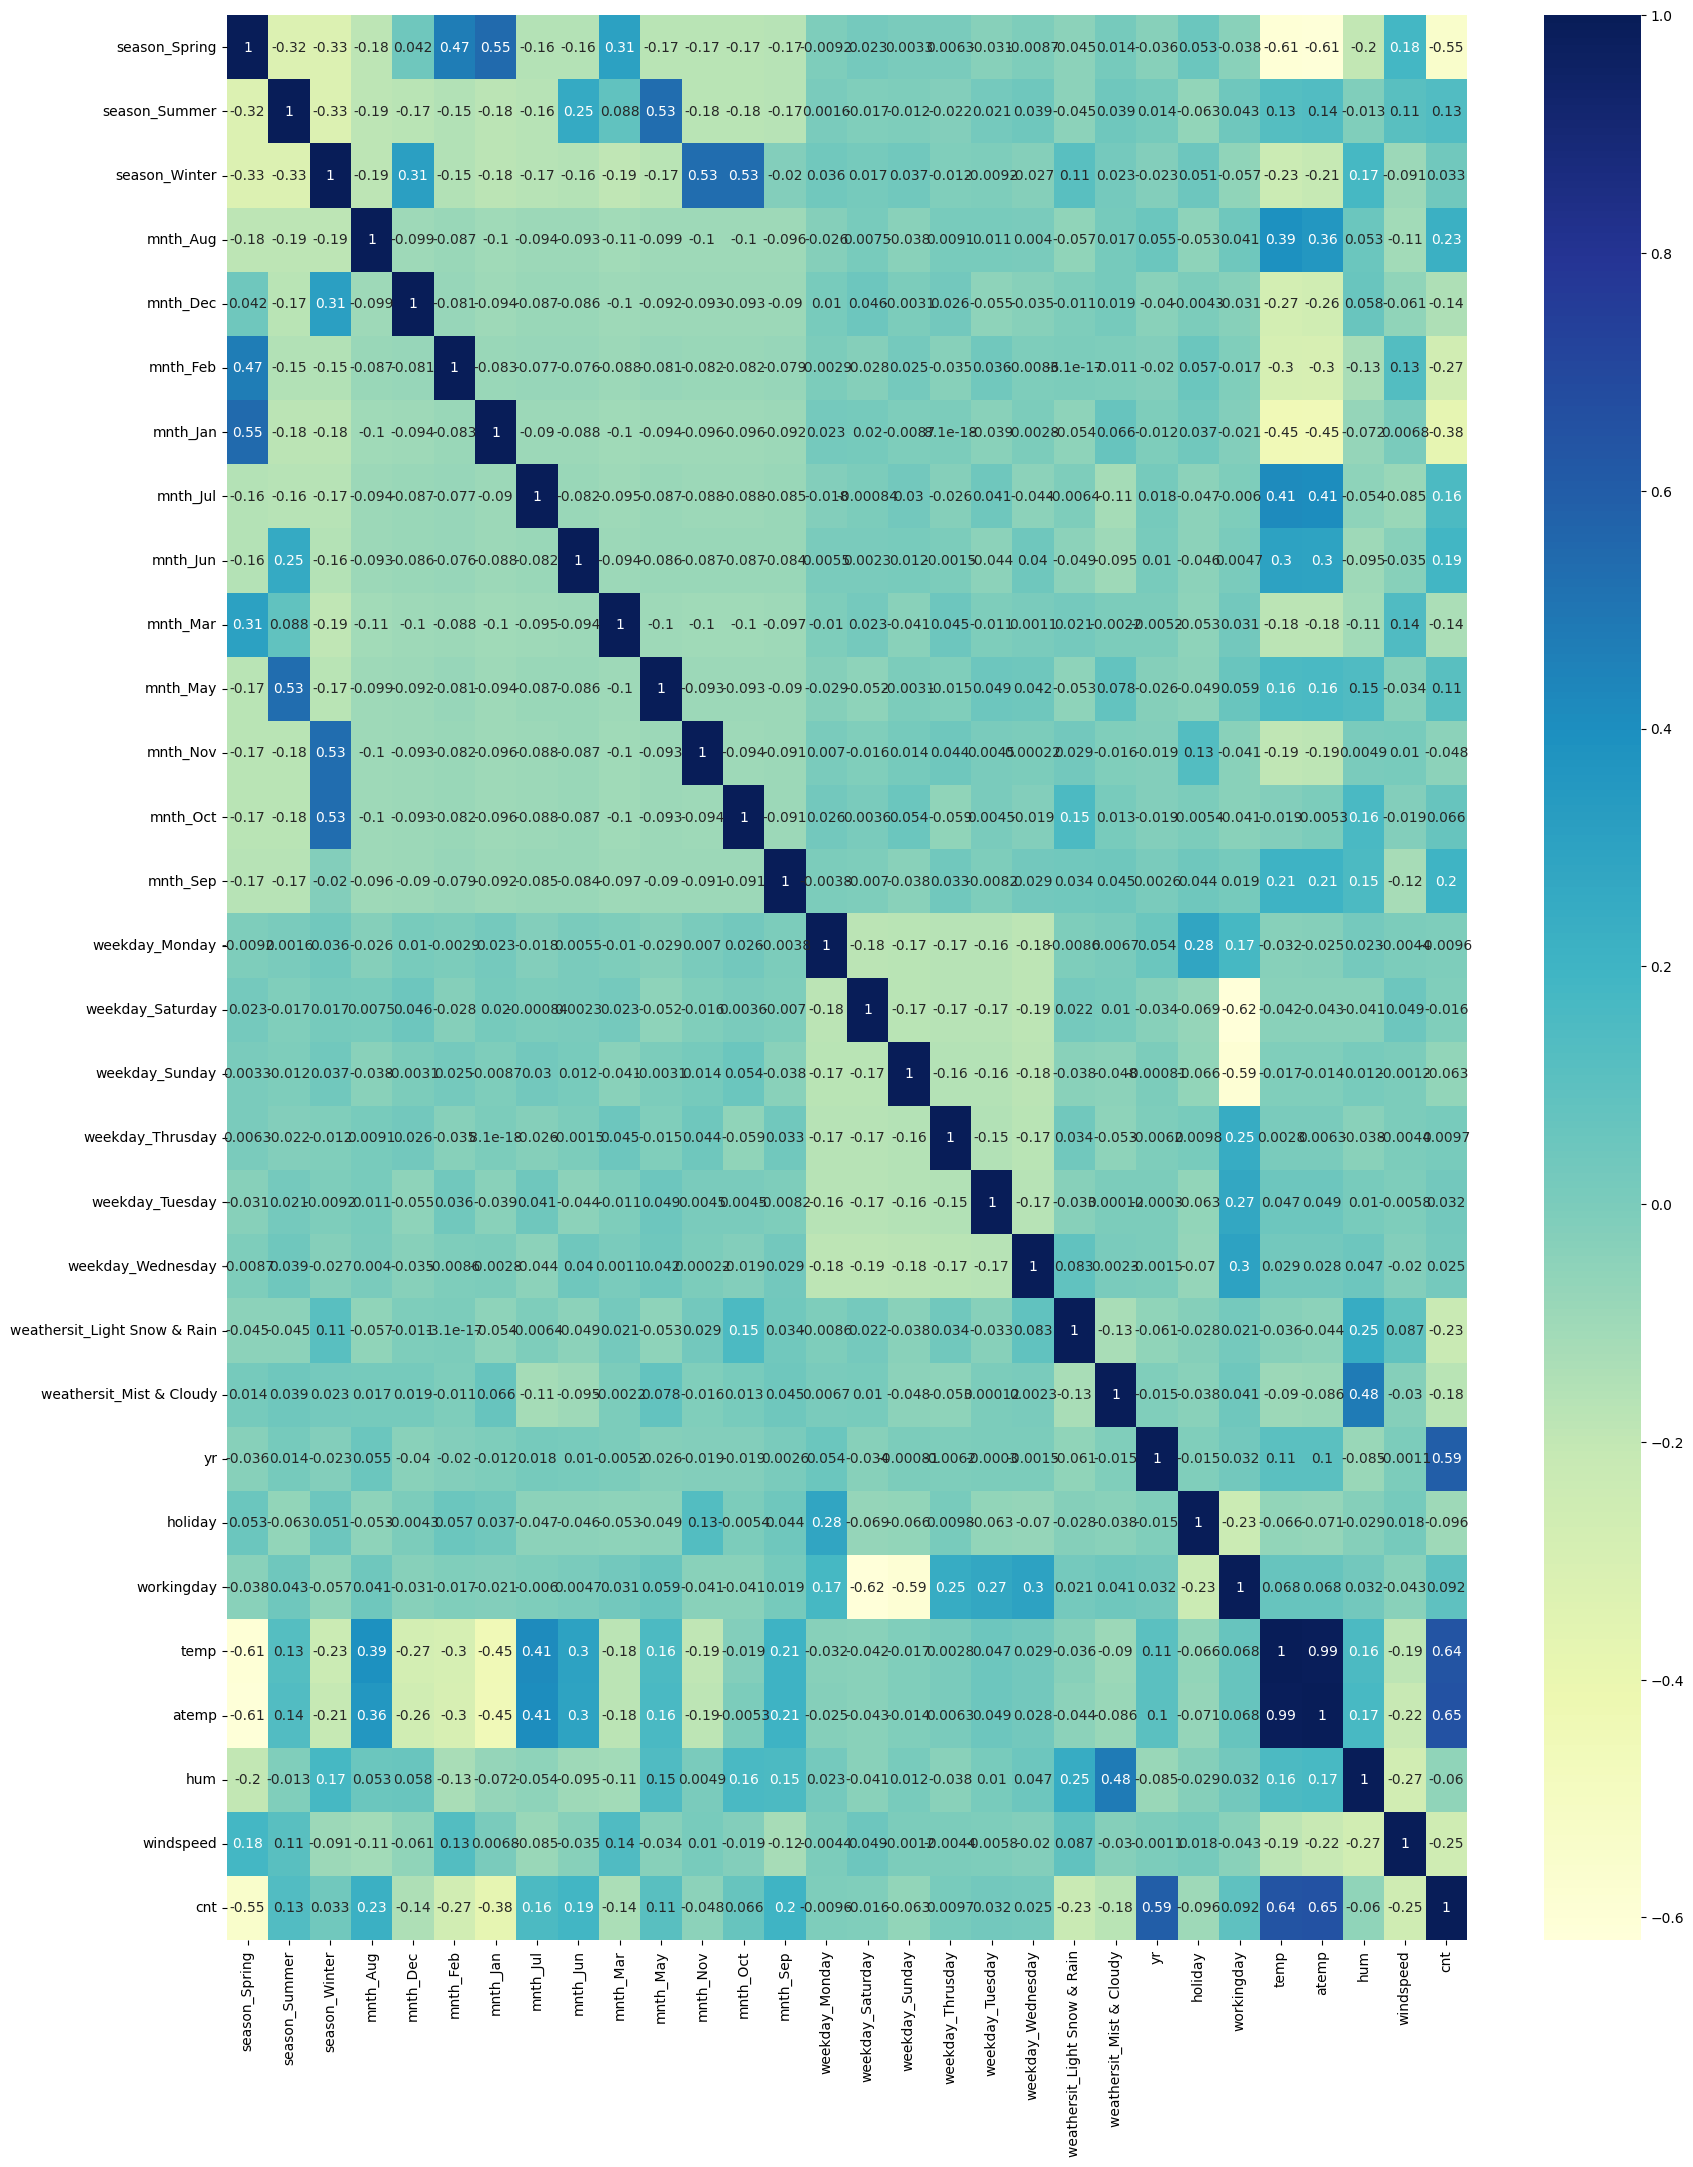

In [208]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Conclusion: 'atemp' and 'temp' seems to be correlated to the target variable 'cnt'. 

### Creating X and Y sets to build the model

In [209]:
y_train = train.pop('cnt')
X_train = train

In [210]:
y_train.shape

(510,)

## Step 7: Building Linear model using mixed approach of RFE & Statsmodel

### Feature Selection: There are total 15 variable that we are considering.

In [211]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [212]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [213]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', np.False_, np.int64(2)),
 ('season_Summer', np.False_, np.int64(2)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(2)),
 ('mnth_Dec', np.False_, np.int64(2)),
 ('mnth_Feb', np.False_, np.int64(2)),
 ('mnth_Jan', np.True_, np.int64(1)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(2)),
 ('mnth_Mar', np.False_, np.int64(2)),
 ('mnth_May', np.False_, np.int64(2)),
 ('mnth_Nov', np.False_, np.int64(2)),
 ('mnth_Oct', np.False_, np.int64(2)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(2)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.True_, np.int64(1)),
 ('weekday_Thrusday', np.False_, np.int64(2)),
 ('weekday_Tuesday', np.False_, np.int64(2)),
 ('weekday_Wednesday', np.False_, np.int64(2)),
 ('weathersit_Light Snow & Rain', np.True_, np.int64(1)),
 ('weathersit_Mist & Cloudy', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, 

In [214]:
col = X_train.columns[rfe.support_]
print(col)

Index(['season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')


In [215]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [216]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Adding a constant variable 

In [217]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [218]:
X_train_rfe.head()

,const,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,1,0,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,1,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,1,0,0,1,1,0,0,0.395666,0.504508,0.188475


#### Running the linear model

In [219]:
lm_a = sm.OLS(y_train,X_train_rfe).fit()

In [220]:
# Check the parameters obtained
lm_a.params

const                           0.179026
season_Winter                   0.096297
mnth_Jan                       -0.068118
mnth_Jul                       -0.081512
mnth_Sep                        0.063506
weekday_Saturday                0.090418
weekday_Sunday                  0.036860
weathersit_Light Snow & Rain   -0.247872
weathersit_Mist & Cloudy       -0.053984
yr                              0.229386
holiday                        -0.029050
workingday                      0.080798
temp                            0.581196
hum                            -0.153181
windspeed                      -0.183170
dtype: float64

#### Getting the Summary for linear model

In [221]:
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.04e-182
Time:                        22:50:57   Log-Likelihood:                 493.77
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     496   BIC:                            -900.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Conclusion : P-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model. 

### Checking VIF for multicollinearity

In [222]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weekday_Sunday,inf
5,weekday_Saturday,inf
10,holiday,inf
11,workingday,inf
12,temp,2.05
13,hum,1.89
8,weathersit_Mist & Cloudy,1.56
2,mnth_Jan,1.45
3,mnth_Jul,1.30
1,season_Winter,1.29


#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [223]:
# dropping `const` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [224]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,33.71
4,weekday_Saturday,8.32
5,weekday_Sunday,8.12
9,holiday,2.23
11,temp,2.05
12,hum,1.89
7,weathersit_Mist & Cloudy,1.56
1,mnth_Jan,1.45
2,mnth_Jul,1.30
0,season_Winter,1.29


In [225]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [226]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,15.63
4,weekday_Saturday,4.35
5,weekday_Sunday,4.01
11,temp,1.91
9,holiday,1.54
1,mnth_Jan,1.45
2,mnth_Jul,1.29
0,season_Winter,1.25
3,mnth_Sep,1.11
12,windspeed,1.10


#### Note:
The VIF value of temp is nearly equal to 5. Hence, we are not dropping this feature.

### Preparing the final model

In [227]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [228]:
# Check the summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.41e-180
Time:                        22:53:34   Log-Likelihood:                 485.94
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     497   BIC:                            -890.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [229]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,15.63
4,weekday_Saturday,4.35
5,weekday_Sunday,4.01
11,temp,1.91
9,holiday,1.54
1,mnth_Jan,1.45
2,mnth_Jul,1.29
0,season_Winter,1.25
3,mnth_Sep,1.11
12,windspeed,1.10


### <font color = 'red'> Conclusion: </font> 

Here we see that except for temp(that has a vif value slightly more than 5, that can be ignored) rest all the columns have a vif value less than 5.

Hence, we finalise `lm_2` as the final model to proceed with the future prdeictions.

## Step 8: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [230]:
y_train_cnt = lm_2.predict(X_train_lm)

Text(0.5, 0.98, 'Error')

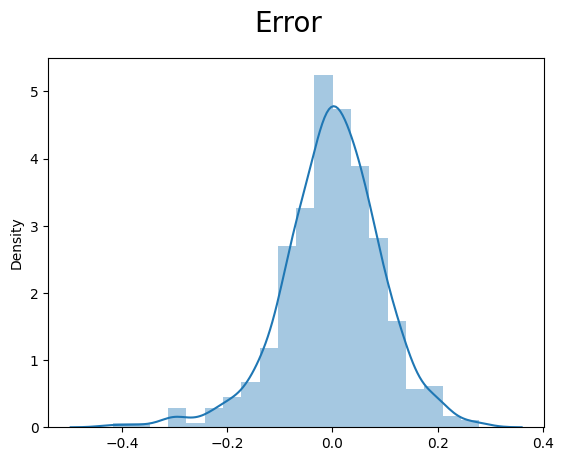

In [231]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error', fontsize = 20)                  # Plot heading 

#### Note: The error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

### Verifying the above conclusion using a qq-plot 

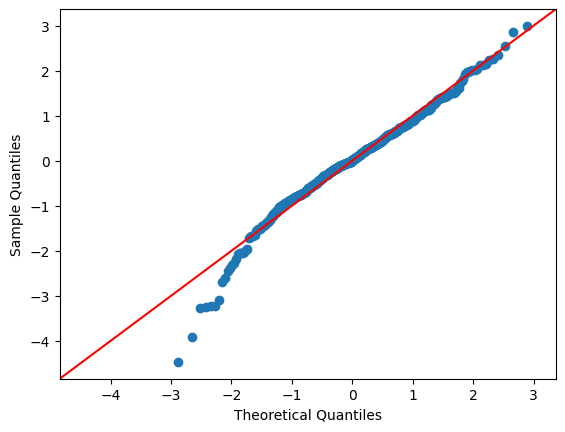

In [239]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

#### So it can be firmly said that most of the data points lie on the straight line, which indicates that the error terms are distributed normally.

## Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [232]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [233]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [234]:
y_test = test.pop('cnt')
X_test = test

In [235]:
# Adding constant variable
X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model

In [236]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Winter                 219 non-null    int64  
 2   mnth_Jan                      219 non-null    int64  
 3   mnth_Jul                      219 non-null    int64  
 4   mnth_Sep                      219 non-null    int64  
 5   weekday_Saturday              219 non-null    int64  
 6   weekday_Sunday                219 non-null    int64  
 7   weathersit_Light Snow & Rain  219 non-null    int64  
 8   weathersit_Mist & Cloudy      219 non-null    int64  
 9   yr                            219 non-null    int64  
 10  holiday                       219 non-null    int64  
 11  workingday                    219 non-null    int64  
 12  temp                          219 non-null    float64
 13  windspeed

In [237]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

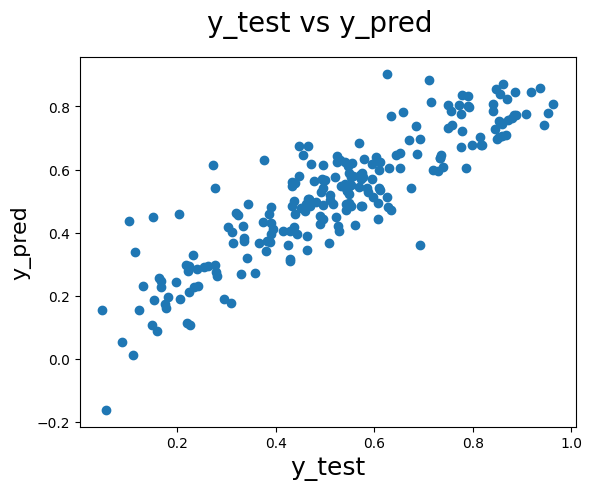

In [242]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [244]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
12,temp,0.553883
9,yr,0.233054
0,const,0.111517
1,season_Winter,0.087969
5,weekday_Saturday,0.075809
11,workingday,0.064450
4,mnth_Sep,0.060387
6,weekday_Sunday,0.017462
10,holiday,-0.046205


### Conclusion : 
It can be safely & clearly concluded that the variables 

1.temperature

2.season/weather situation

3.month

are significant in predicting the demand for shared bikes.

# Recommendations to the Company:

1. months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have higher demad
2. Demand Raises during winter session
3. temperature is directly proprtional to the demand. As temprature increases demand also increases.